## Things to be completed:
- What is $g(x,y)$ set to and why?

# Pressure waves in a box

In this lesson we examine the 2D wave equation simulating a pressure wave traversing through a rectangular box. This simulation relates closely to what occurs inside of a piezoelectrically driven printhead. In such devices a piezoelectric transducer periodically causes mechanical deformation of an ink channel, inputting pressure waves into to fluid which reflect around and intefere with eachother resulting in the despensing of droplets. See a simplified schematic below.

<img src="inkchannel.png">
<br/>
#### Figure 1. Piezoelecric inkjet printhead schematic

The dependent vaiable will be the pressure field but for simplicity we will derive all of the necessary equations with the dependent variable $u$.
<br/>

### The 2D wave Equation

The wave equation is a hyperbolic partial differential equation. In 2D it is written as follows:

\begin{equation} \label{eq:1}
\frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u
\end{equation}

Or writing out the Laplacian, $\nabla^2$

\begin{equation} \label{eq:2}
\frac{\partial^2 u}{\partial t^2} = c^2\left(\frac{\partial^2 u}{\partial x^2} + \
\frac{\partial^2 u}{\partial y^2}\right)
\end{equation}

### Discretization
Here we are going to solve it using a central time, central space leapfrog method. First we need to descretize the equation. We will denote time steps by the letter $n$, spatial steps in the x and y directions will be denoted by $i$ and $j$ respectively. Applying the central difference in time and space the the left and righ hand sides gives:

\begin{equation} \label{eq:3}
\frac{u_{ij}^{n+1} - 2u_{ij}^{n} + u_{ij}^{n-1}}{\Delta t^{2}} =
c^2\left(\frac{u^{n}_{i+1,j} - 2u^{n}_{ij} + u^{n}_{i-1,j}}{\Delta x^{2}} +\
\frac{u^{n}_{i,j+1} - 2u^{n}_{ij} + u^{n}_{i,j-1}}{\Delta y^{2}}\right)
\end{equation}

<br/>
We then need to solve for the unknown variable $u_{ij}^{n+1}$
<br/>

Letting $\sigma_x = \frac{\Delta t^2 c^2}{\Delta x^2}$ and $\sigma_y = \frac{\Delta t^2 c^2}{\Delta y^2}$ the expression for u at the next time step becomes:

\begin{equation} \label{eq:4}
u_{ij}^{n+1} = \sigma_x^2(u_{i+1,j}^n + u_{i-1,j}^n) + \sigma_y^2(u_{i,j+1}^n + \
u_{i,j-1}^n) + 2(1-\sigma_x - \sigma_y)u_{ij}^n - u_{ij}^n
\end{equation}

The stencil for this descretization can be seen in Figure 2 below. We can see that the next time step at $n+1$ is dependent on information from the previous two time steps. The requires us to solve the first time at $n = 1$ seperately from the others. We will address this at the end of the next section once we have defined our initial conditions.

<img src="stencil.png">
#### Figure 2. Stencil for leapfrog scheme

### Initial conditions
Since we have a second order time derivative we need two initial conditions which will come in the form of $u(x,y,0) = f(x,y)$ and $\frac{\partial u}{\partial t} = g(x,y)$

Our initial pressure field will be a Gaussian function centered on the top edge of our rectangular domain and spread out along its width.

\begin{equation} \label{eq:5}
f(x,y) = A e^{-\left(\frac{(x - x_0)^2}{2\lambda_x^2} + \frac{(y - y_0)^2}{2\lambda_y^2}\right)}
\end{equation}

Where $x_0$ and $y_0$ are the center of the peak of the wave and $\lambda_x$ and $\lambda_y$ are a factor of "spread-out-ness" in the x and y directions respectively.

We set $g(x,y) = something$ becasue... We then discretize this to arrive at the expression for the first time step $u_{ij}^1$:

\begin{equation} \label{eq:6}
\frac{\partial u}{\partial t} = g(x,y) \rightarrow \frac{u_{ij}^{1} - u_{ij}^{-1}}{2\Delta t} \rightarrow u_{ij}^{-1} = u_{ij}^1 - 2\Delta t g(x,y)
\end{equation}

\begin{equation} \label{eq:7}
u_{ij}^1 = \frac{\sigma_x^2}{2}(u_{i+1,j}^0 + u_{i-1,j}^0) + \frac{\sigma_y^2}{2}(u_{i,j+1}^0 + u_{i,j-1}^0) + 2\Delta t g_{ij}
\end{equation}



### Boundary Conditions 
We want the wave to be reflected back into the domain at the boundaries. This can be done with either Dirichlet or Neumann boundary conditions. Explained in more detail [here](http://hplgit.github.io/INF5620/doc/pub/sphinx-wave/._main_wave003.html
).

We will be applying the Neumann boundary conditions so to preserve the sign of the reflected wave. The boundary conditions are defined using the normal derivitave of u at the boundaries:

\begin{equation} \label{eq:8}
\frac{\partial n}{\partial n}\equiv \textbf{n} \cdot\nabla u = 0
\end{equation}

The derivative with respect to n is in the outward normal direction from the boundary. 

To incorporate this condition into our scheme we apply the same sentral difference approximation. At the left hand vertical boundary where $i = 0$ we have

\begin{equation} \label{eq:9}
\frac{u_{-1,j}^n - u_{1,j}^n}{2\Delta x} = 0
\end{equation}

however, the value $u_{-1,j}$ is not defined in our domain. We can either make use of an extra layer of points all around our domain (ghost points), or by looking at equation $\ref{eq:5}$ and $\ref{eq:6}$ with the normal derivative set equal to zero, it can be seen that $u_{-1,j}^n = u_{1,j}^n$. We can then write the wave equation for the interior boundary points at $i=0$ as

\begin{equation} \label{eq:10}
u_{0,j}^{n+1} = 2\sigma_x^2 u_{1j}^n + 2\sigma_y^2(u_{0,j+1}^n + u_{0,j-1}^n)+\ 2(1 - \sigma_x^2 - \sigma_y^2)u_{0j}^n - u_{0j}^{n-1}
\end{equation}

Following the same rational, the equations for the other boundaries, including the corners are as follows:

Right boundary where $i = N_x$:
\begin{equation} \label{eq:11}
u_{N_x,j}^{n+1} = 2\sigma_x^2 u_{N_{x-1},j}^n + 2\sigma_y^2(u_{N_x,j+1}^n + u_{N_x,j-1}^n)+\ 2(1 - \sigma_x^2 - \sigma_y^2)u_{N_x,j}^n - u_{N_x,j}^{n-1}
\end{equation}

Bottom boundary where $j = 0$:
\begin{equation} \label{eq:12}
u_{i,0}^{n+1} = 2\sigma_x^2 (u_{i+1,0}^n + u_{i-1,0}) + 2\sigma_y^2u_{i,1}^n+\ 2(1 - \sigma_x^2 - \sigma_y^2)u_{i,0}^n - u_{i,0}^{n-1}
\end{equation}

Top boundary where $j = N_y$:
\begin{equation} \label{eq:13}
u_{i,N_y}^{n+1} = 2\sigma_x^2 (u_{i+1,N_y}^n + u_{i-1,N_y}) + 2\sigma_y^2u_{i,N_{y-1}}^n + 2(1 - \sigma_x^2 - \sigma_y^2)u_{i,N_y}^n - u_{i,N_y}^{n-1}
\end{equation}

Bottom left corner where $i = j = 0$:
\begin{equation} \label{eq:14}
u_{0,0}^{n+1} = 2\sigma_x^2 u_{1,0}^n + 2\sigma_y^2u_{0,1}^n + 2(1 - \sigma_x^2 - \sigma_y^2)u_{0,0}^n - u_{0,0}^{n-1}
\end{equation}

Top left corner where $i = 0, j = N_y$:
\begin{equation} \label{eq:15}
u_{0,N_y}^{n+1} = 2\sigma_x^2 u_{1,N_y}^n + 2\sigma_y^2u_{0,N_{y-1}}^n + 2(1 - \sigma_x^2 - \sigma_y^2)u_{0,N_y}^n - u_{0,N_y}^{n-1}
\end{equation}

Bottom right corner where $i = N_x, j = 0$:
\begin{equation} \label{eq:16}
u_{N_x,0}^{n+1} = 2\sigma_x^2 u_{N_{x-1},0}^n + 2\sigma_y^2u_{N_x,1}^n + 2(1 - \sigma_x^2 - \sigma_y^2)u_{N_x,0}^n - u_{N_x,0}^{n-1}
\end{equation}

Top right corner where $i = N_x, j = N_y$:
\begin{equation} \label{eq:17}
u_{N_x,N_y}^{n+1} = 2\sigma_x^2 u_{N_{x-1},N_y}^n + 2\sigma_y^2u_{N_x,N_{y-1}}^n + 2(1 - \sigma_x^2 - \sigma_y^2)u_{N_x,N_y}^n - u_{N_x,N_y}^{n-1}
\end{equation}


### Stability
The von Neumann stability condition for the 2D wave equation is the following:

\begin{equation} \label{eq:18}
\left(\frac{\Delta t}{\Delta x}\right) + \left(\frac{\Delta t}{\Delta y}\right) \leq 1 \rightarrow \Delta t = \left(\frac{\Delta x^2 \Delta y^2}{\Delta x^2 + \Delta y^2}\right)^{\frac{1}{2}}
\end{equation}

Details can be found [here](http://math.mit.edu/classes/18.086/2006/am53.pdf), expertly explained by Gilbert Strang.

### Python Implementation
We now create two functions, one for creating the initial conditions of the problem and another for calculating all the other time steps and applying boundary conditions.

We first import all of the libraries we'll be using

In [1]:
import numpy
from matplotlib import pyplot, cm, rcParams
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
rcParams['font.size'] = 14
from matplotlib import animation
from IPython.display import HTML

##### Functions
We then define our functions, one for creating initial conditions and one for solving the wave equation using the leapfrog method.

In [2]:
def init_cond(ny,nx,Lx,Ly,X,Y):
    """Creates initial conditions for 2D wave, a Guassian function centered on
        the top edge of the box and spread out over the middle.
    
    Parameters:
    -----------
    ny: int
        number of spatial steps in vertical direction
    nx: int 
        number of spatial steps in horizontal direction
    Lx: int
        total length in x direction
    Ly: int
        total length in y direction
    X:  2D array of float
        meshgrid in x
    Y:  2D array of float
        meshgrin in y
        
    Returns:
    --------
    pi: 2D array of floats
        initial gaussian pressure distribution
        indexing: pi[vertical space step, horizontal space step]
    """
    # Gaussian wave function, f 
    a = 1           # amplitude of wave
    sprx = Lx*0.7   # spread of wave in x dir
    spry = 0.2*Ly   # spread of wave in y dir
    x0 = Lx/2       # center of wave in x dir
    y0 = Ly         # center of wave in y dir
    f = numpy.zeros((ny,nx))
    f = a*numpy.exp(-((X-x0)**2/(2*sprx**2) + (Y-y0)**2/(2*spry**2)))
    
    pi = numpy.zeros((ny,nx)) # initiallize pressure array
    pi = f                    # assign f to initial pressure array
    
    return pi

In [3]:
def solve_wave(pi, dy, dx, nt, dt, c):
    """Solves the 2D wave equation using the leapfrog scheme
        with central differences.
    
    Parameters:
    -----------
    pi: 2D array of float
        initial wave condition
    dy: float
        spatial step in y direction
    dx: float
        spatial step in x direction
    nt: int
        number of time steps
    dt: float
        temporal step
    c:  float
        wavespeed
        
    Returns:
    --------
    p: 3D array of float
       Solution to the wave equation at each time step defined by nt
       Indexing: p[time step, y coordinate, x coordinate]
    """
    # these help to simplify expression (s = sigma)
    sx = c*dt/dx
    sy = c*dt/dy
    
    # initialize pressure array
    p = numpy.zeros((nt,ny,nx))
    p[0] = pi.copy()             # copy initial Gaussian wave
    
    """________________________begin_first_time_step___________________"""
    # For first time step:
    g = numpy.zeros((ny,nx))     # 2nd initial condition du/dt = g(x,y)
    # interior points
    p[1,1:-1,1:-1] = 1/2*sx**2*(p[0,1:-1,2:] + p[0,1:-1,:-2]) +\
                     1/2*sy**2*(p[0,2:,1:-1] + p[0,:-2,1:-1]) -\
                     (1 - sx**2 - sy**2)*p[0,1:-1,1:-1] +\
                     dt*g[1:-1,1:-1]
    
    # Neumann boundary conditions for the first step
    # left boundary, i = 0
    p[1,1:-1,0] = (2*sx**2*p[0,1:-1,1] +\
                   sy**2*(p[0,2:,0] + p[0,:-2,0]) +\
                   2*(1 - sx**2 - sy**2)*p[0,1:-1,0])*0.5 +\
                   dt*g[1:-1,0]

    # right boundary, i = nx          
    p[1,1:-1,-1] = (2*sx**2*p[0,1:-1,-2] +\
                   sy**2*(p[0,2:,-1] + p[0,:-2,-1]) +\
                   2*(1 - sx**2 - sy**2)*p[0,1:-1,-1])*0.5 +\
                   dt*g[1:-1,-1] 

    # bottom boundary, j = 0
    p[1,0,1:-1] = (sx**2*(p[0,0,2:] + p[0,0,:-2]) +\
                  2*sy**2*p[0,1,1:-1] +\
                  2*(1 - sx**2 - sy**2)*p[0,0,1:-1])*0.5 +\
                  dt*g[0,1:-1]

    # top boundary, j = ny
    p[1,-1,1:-1] = (sx**2*(p[0,-1,2:] + p[0,-1,:-2]) +\
                   2*sy**2*p[0,-2,1:-1] +\
                   2*(1 - sx**2 - sy**2)*p[0,-1,1:-1])*0.5 +\
                   dt*g[-1,1:-1]

    # bottom left corner, i = 0, j = 0
    p[1,0,0] = (2*sx**2*p[0,0,1] +\
               2*sy**2*p[0,1,0] +\
               2*(1 - sx**2 - sy**2)*p[0,0,0])*0.5 +\
               dt*g[0,0]

    # top left corner, i = 0, j = ny
    p[1,-1,0] = (2*sx**2*p[0,-1,1] +\
                2*sy**2*p[0,-2,0] +\
                2*(1 - sx**2 - sy**2)*p[0,-1,0])*0.5 +\
                dt*g[-1,0]

    # bottom right corner, i = nx, j = 0
    p[1,0,-1] = (2*sx**2*p[0,0,-1] +\
                2*sy**2*p[0,1,-1] +\
                2*(1 - sx**2 - sy**2)*p[0,0,-1])*0.5 +\
                dt*g[0,-1]

    # top right corner, i = nx, j = ny
    p[1,-1,-1] = (2*sx**2*p[0,-1,-2] +\
                 2*sy**2*p[0,-2,-1] +\
                 2*(1 - sx**2 - sy**2)*p[0,-1,-1])*0.5 +\
                 dt*g[-1,-1]
    """_________________________end_first_time_step________________________"""       
    for n in range(1,nt-1):
        
        # iterate through time steps    
        p[n+1,1:-1,1:-1] = sx**2*(p[n,1:-1,2:] + p[n,1:-1,:-2]) +\
                           sy**2*(p[n,2:,1:-1] + p[n,:-2,1:-1]) +\
                           2*(1 - sx**2 - sy**2)*p[n,1:-1,1:-1] - \
                           p[n-1,1:-1,1:-1]
        
        # Apply zero Neumann boundary conditions on all edges and corners
        # left boundary, i = 0
        p[n+1,1:-1,0] = 2*sx**2*p[n,1:-1,1] +\
                        sy**2*(p[n,2:,0] + p[n,:-2,0]) +\
                        2*(1 - sx**2 - sy**2)*p[n,1:-1,0] -\
                        p[n-1,1:-1,0]  

        # right boundary, i = nx          
        p[n+1,1:-1,-1] = 2*sx**2*p[n,1:-1,-2] +\
                         sy**2*(p[n,2:,-1] + p[n,:-2,-1]) +\
                         2*(1 - sx**2 - sy**2)*p[n,1:-1,-1] -\
                         p[n-1,1:-1,-1] 
    
        # bottom boundary, j = 0
        p[n+1,0,1:-1] = sx**2*(p[n,0,2:] + p[n,0,:-2]) +\
                        2*sy**2*p[n,1,1:-1] +\
                        2*(1 - sx**2 - sy**2)*p[n,0,1:-1] -\
                        p[n-1,0,1:-1]

        # top boundary, j = ny
        p[n+1,-1,1:-1] = sx**2*(p[n,-1,2:] + p[n,-1,:-2]) +\
                         2*sy**2*p[n,-2,1:-1] +\
                         2*(1 - sx**2 - sy**2)*p[n,-1,1:-1] -\
                         p[n-1,-1,1:-1]
                    
        # bottom left corner, i = 0, j = 0
        p[n+1,0,0] = 2*sx**2*p[n,0,1] +\
                     2*sy**2*p[n,1,0] +\
                     2*(1 - sx**2 - sy**2)*p[n,0,0] -\
                     p[n-1,0,0]
                    
        # top left corner, i = 0, j = ny
        p[n+1,-1,0] = 2*sx**2*p[n,-1,1] +\
                      2*sy**2*p[n,-2,0] +\
                      2*(1 - sx**2 - sy**2)*p[n,-1,0] -\
                      p[n-1,-1,0]
                    
        # bottom right corner, i = nx, j = 0
        p[n+1,0,-1] = 2*sx**2*p[n,0,-1] +\
                      2*sy**2*p[n,1,-1] +\
                      2*(1 - sx**2 - sy**2)*p[n,0,-1] -\
                      p[n-1,0,-1]
                    
        # top right corner, i = nx, j = ny
        p[n+1,-1,-1] = 2*sx**2*p[n,-1,-2] +\
                       2*sy**2*p[n,-2,-1] +\
                       2*(1 - sx**2 - sy**2)*p[n,-1,-1] -\
                       p[n-1,-1,-1]
    return p

##### Discretization and problem parameters
We then define all of the problem parameters and generate the discretization.

In [4]:
# Spacial Discretizations
Lx = 10                     # length in x direction (horizontal)
Ly = 4                      # length in y direction (vertical)
nx = 251                    # number of discretizations in x
ny = 151                    # number of discretizations in y
dx = Lx/(nx-1)              # spatial increment in x
dy = Ly/(ny-1)              # spatial increment in y
x = numpy.linspace(0,Lx,nx) # array for plotting in x
y = numpy.linspace(0,Ly,ny) # array for plotting in y
X,Y = numpy.meshgrid(x,y)   # mesh grid for plotting

# time discretization
nt = 1400                                 # number of time steps
dt = (dx**2*dy**2/(dx**2 + dy**2))**(1/2) # time increment

c = 1 # wavespeed

To solve the problem we call the two functions

In [5]:
pi = init_cond(ny,nx,Lx,Ly,X,Y)
p = solve_wave(pi.copy(),dy,dx,nt,dt,c)

##### Visualization
Now we visualize the wave by a contour-like plot animation

First we initialize the figure and some functions for our animation function to call. I am hiding the initial figure thats output below the following cell.

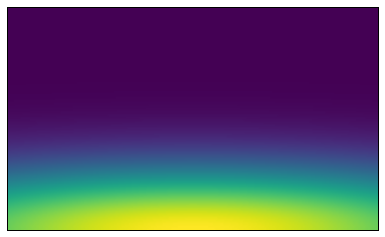

In [6]:
fig = pyplot.figure(figsize=(10,4))
pyplot.xticks([]), pyplot.yticks([]);
im = pyplot.imshow(p[0], cmap=cm.viridis)

In [7]:
def init():
    im.set_data(numpy.zeros((ny,nx)))
    return im,
def animate(data):
    im.set_array(data)
    return im,

In [8]:
anim = animation.FuncAnimation(fig, animate, frames=p, interval=25)

And then display the animation in the notebook

In [9]:
HTML(anim.to_html5_video())

In [ ]:
# 3D visualization

### Verification
We need to verify that our solver is generating the correct solution. Since the 2D wave equation can be solved via separation of vaiables, we will compare with the Fourier series approximation to the exact solution of the problem. Details on the solution method can be found [here](http://www.math.tamu.edu/~yvorobet/Math412/Home4solved.pdf).

To save some room we created a separate funciton to generate the analytical solution. We can load it directly.

In [ ]:
# import and run analytical solver function


In [ ]:
# generate the solution variable and compare using l1 or l2 norm and plot differences

In [10]:
from IPython.core.display import HTML
css_file = 'numericalmoocstyle.css'
HTML(open(css_file, "r").read())